# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


/Users/liuruichen/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Part 2: Implement SVD for Dimensionality Reduction

In [14]:
def apply_svd_custom(X_train, X_test, n_components):
    # Compute the covariance matrix
    cov_matrix = np.cov(X_train, rowvar=False)

    # Compute the SVD
    U, S, Vt = np.linalg.svd(cov_matrix)

    # Reduce the dimensionality
    U_reduced = U[:, :n_components]
    X_train_reduced = X_train @ U_reduced
    X_test_reduced = X_test @ U_reduced

    return X_train_reduced, X_test_reduced, Vt

## Part 3: Train Logistic Regression and Measure Performance

In [15]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [16]:
svd_components = [100]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, Vt = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results
    results.append((n_components, accuracy, training_time))
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 26.9747 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8035, Training time: 0.4305 seconds
Applying custom SVD with 30 components...
SVD components: 30, Accuracy: 0.8922, Training time: 2.2052 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9080, Training time: 6.3393 seconds
Applying custom SVD with 70 components...
SVD components: 70, Accuracy: 0.9147, Training time: 10.1514 seconds
Applying custom SVD with 90 components...
SVD components: 90, Accuracy: 0.9185, Training time: 25.0498 seconds
Applying custom SVD with 110 components...
SVD components: 110, Accuracy: 0.9180, Training time: 39.6673 seconds


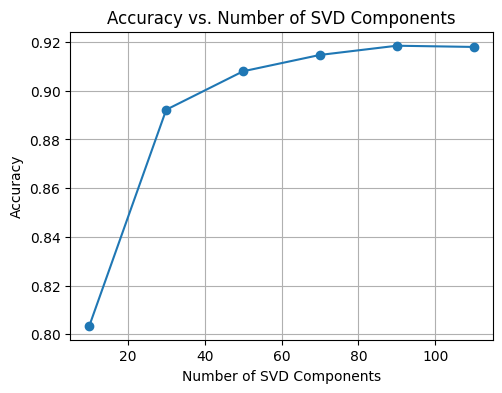

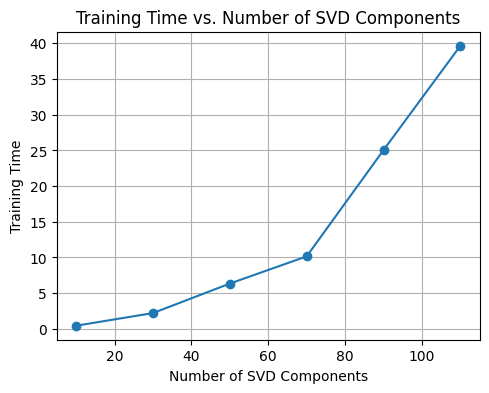

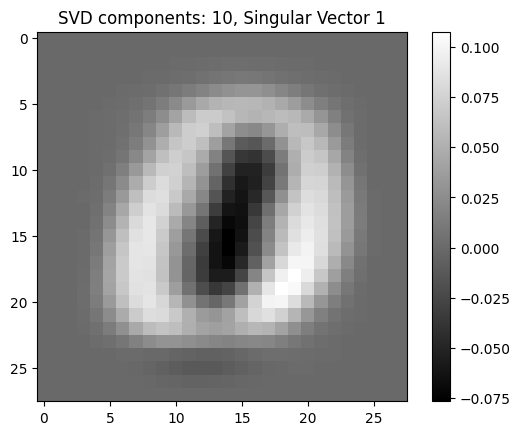

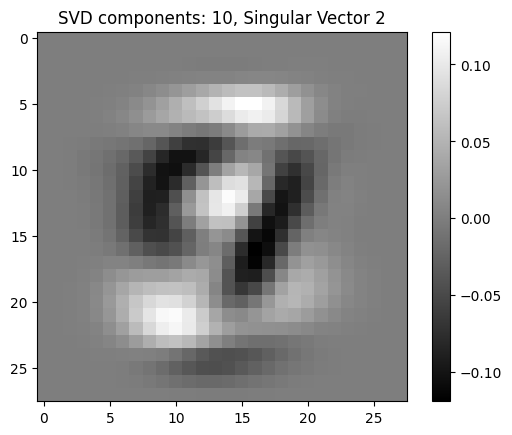

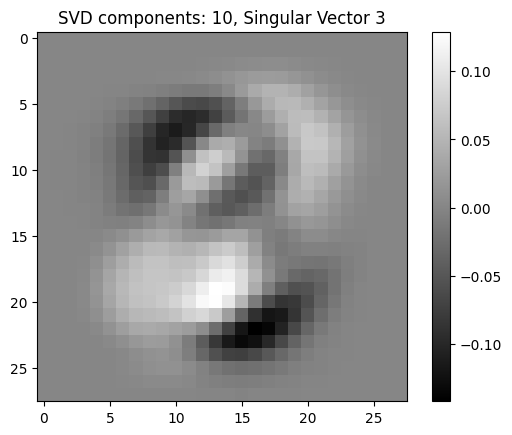

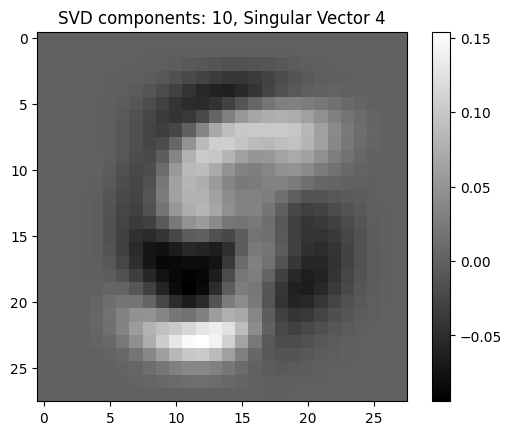

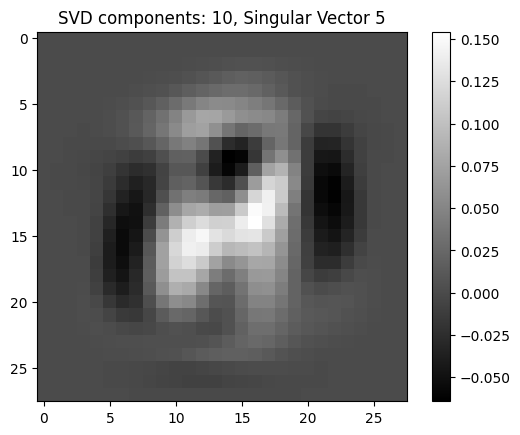

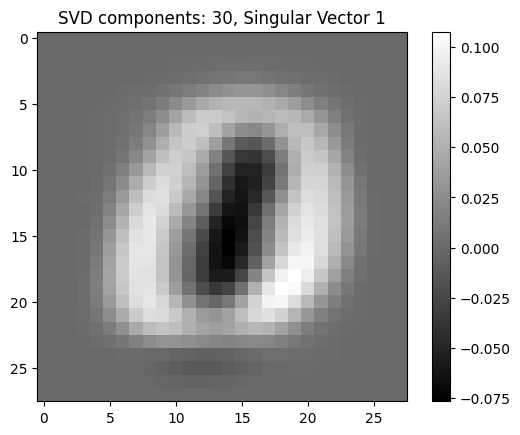

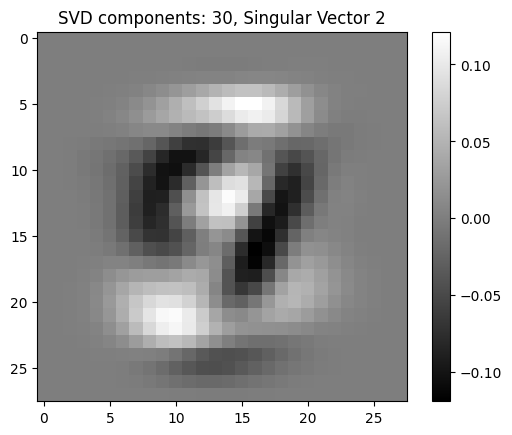

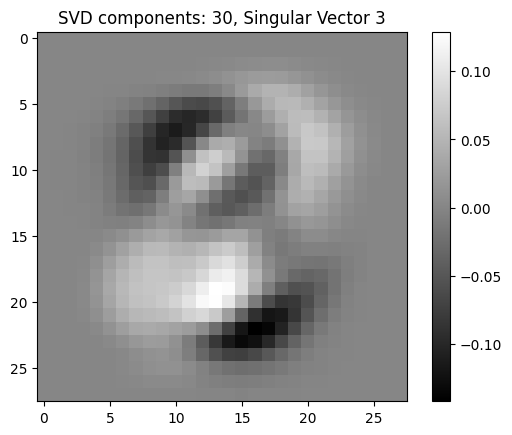

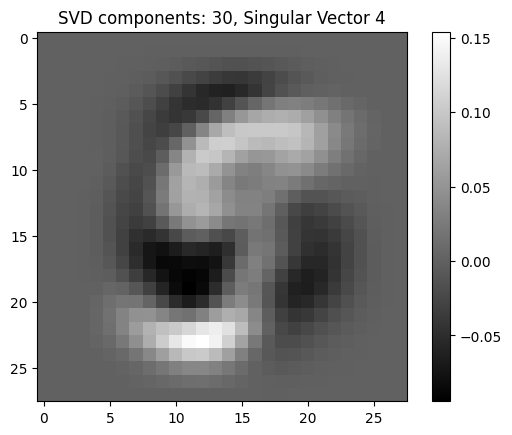

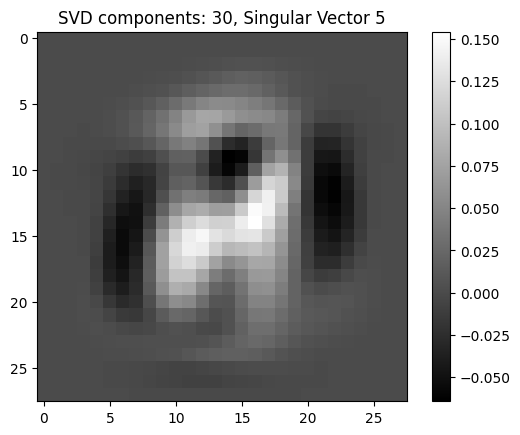

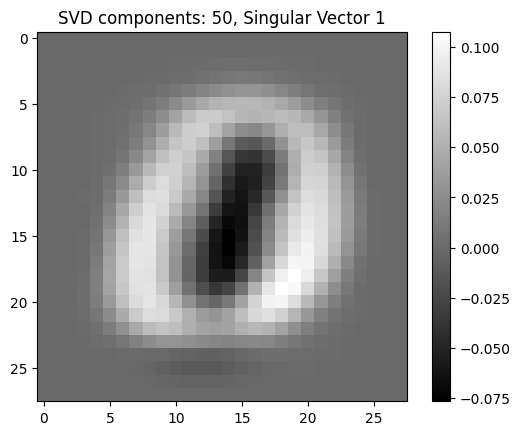

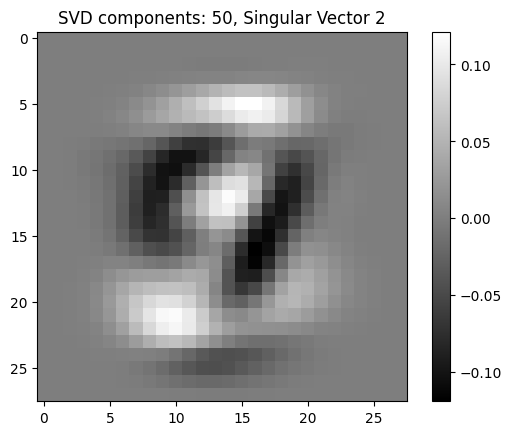

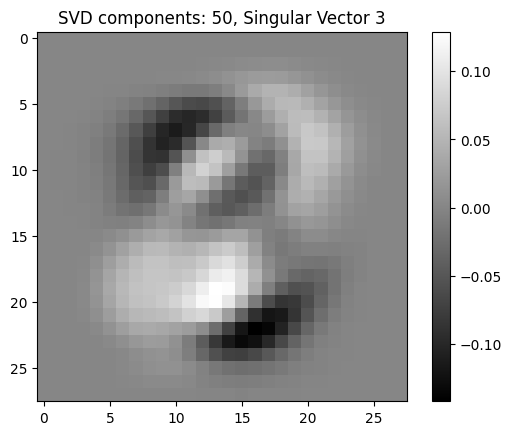

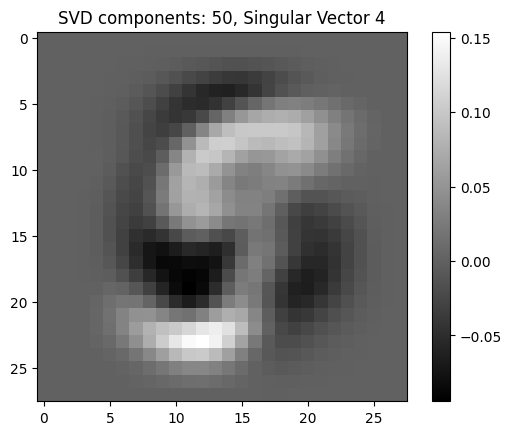

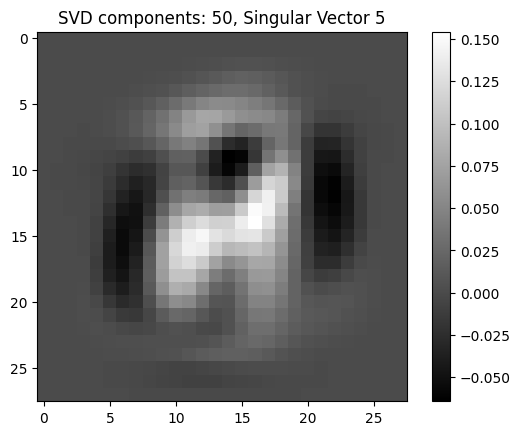

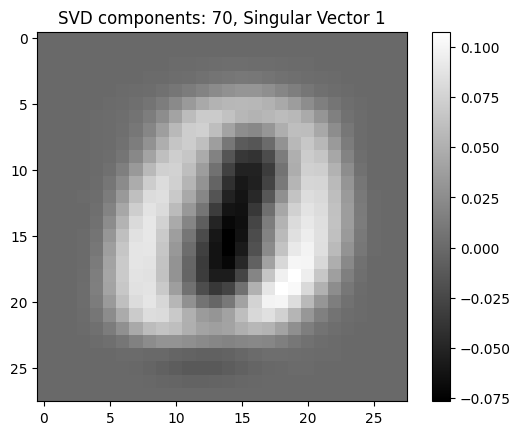

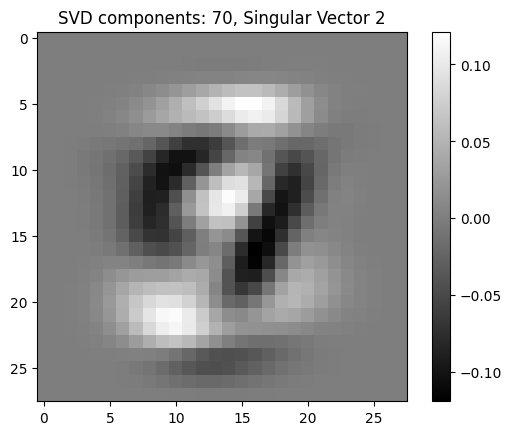

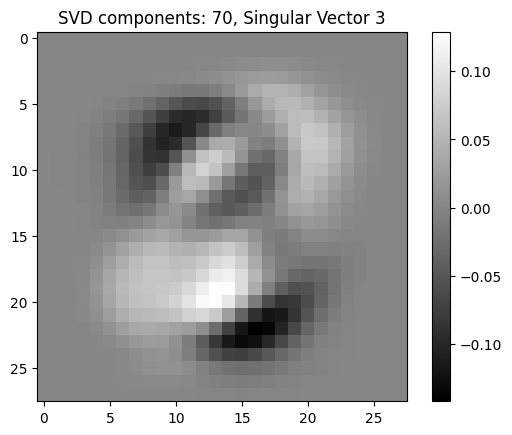

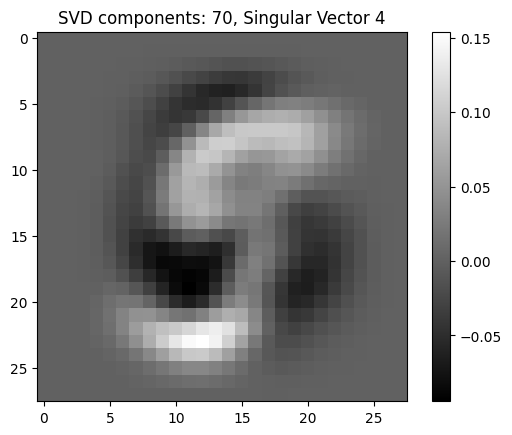

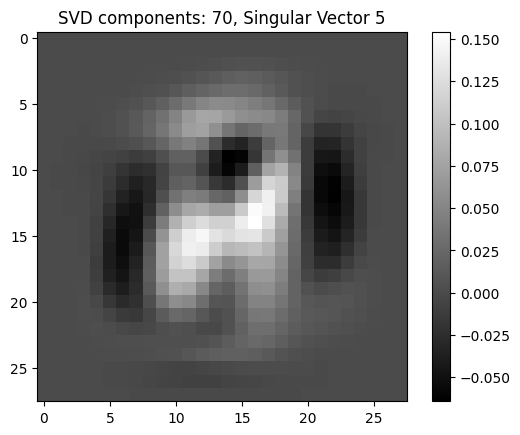

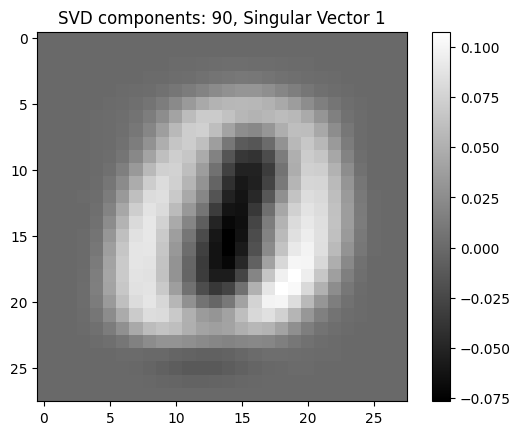

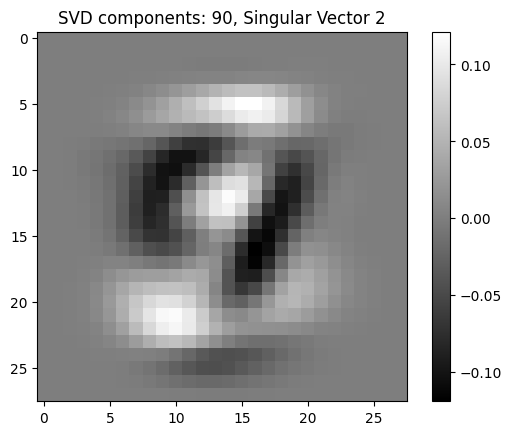

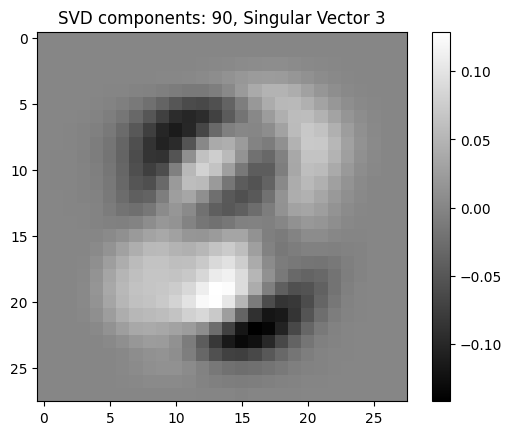

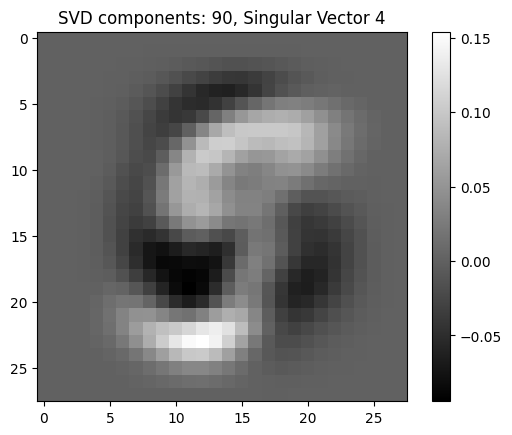

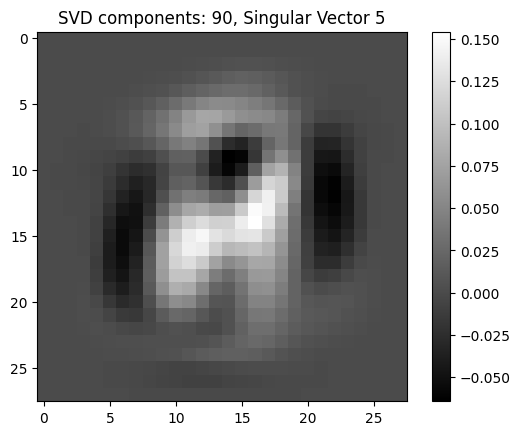

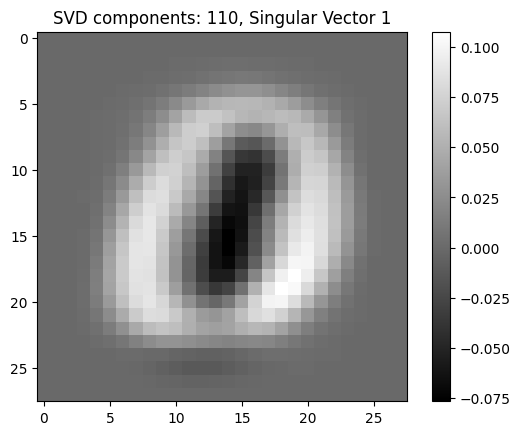

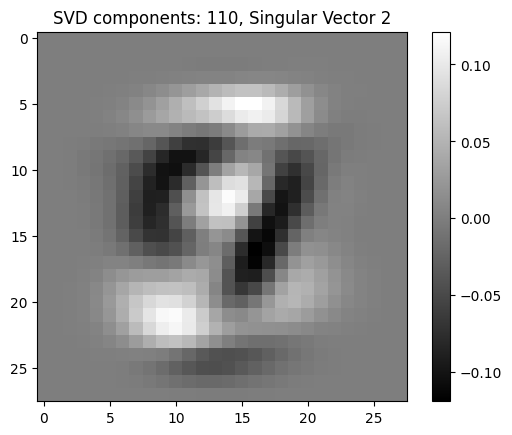

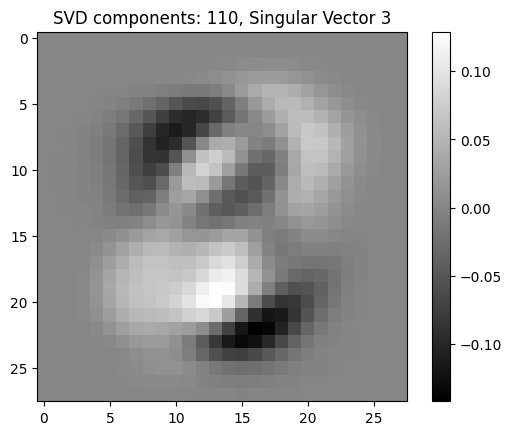

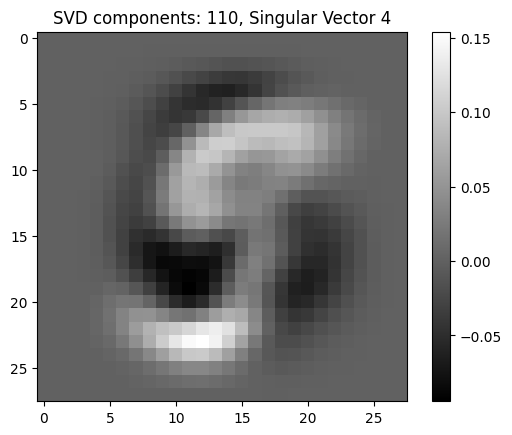

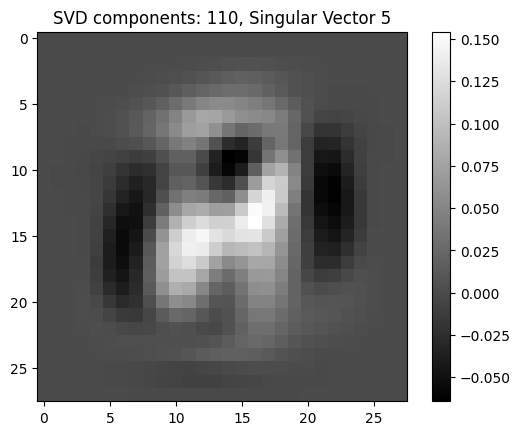

In [20]:
# Record the results
accuracy_results = {}
training_time_results = {}
singular_vectors_results = {}

# Train models with different levels of SVD preprocessing
for i in range(10, 111, 20):
    print(f"Applying custom SVD with {i} components...")
    X_train_svd, X_test_svd, Vt = apply_svd_custom(X_train, X_test, i)
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    accuracy_results[i] = accuracy
    training_time_results[i] = training_time
    singular_vectors_results[i] = Vt[:5]  # Store top 5 singular vectors
    print(f"SVD components: {i}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# Plot Accuracy vs. Number of SVD Components
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o')
plt.title("Accuracy vs. Number of SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Accuracy")
plt.grid(True)

# Plot Training Time vs. Number of SVD Components
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(list(training_time_results.keys()), list(training_time_results.values()), marker='o')
plt.title("Training Time vs. Number of SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Training Time")
plt.grid(True)

# Plot top 5 singular vectors for each number of SVD components
for n_components, singular_vectors in singular_vectors_results.items():
    for i, singular_vector in enumerate(singular_vectors):
        plt.figure()
        plt.imshow(singular_vector.reshape(28, 28), cmap='gray')  # Reshape to 28x28
        plt.title(f'SVD components: {n_components}, Singular Vector {i+1}')
        plt.colorbar()
        plt.grid(False)
        plt.show()



## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

After some experiments and visualizations, I found 100 components is the best choice. Even with more components, the accuracy of the model does not increase significantly, but the training time increases drastically. The top 5 singular vectors show that the first few components capture the most important features of the data. Therefore, 100 components are sufficient to represent the data effectively while reducing the dimensionality and training time significantly.